## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

**Цель исследования** - изучить рынок российского кинопроката и выявить текущие тренды. Необходимо уделить внимание фильмам, которые получили государственную поддержку и ответить на вопрос, насколько такие фильмы интересны зрителю.
Данные опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.


### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. Откроем исходные таблицы и изучим информацию, содержащуюся в них.


In [1]:
import pandas as pd # импорт библиотеки pandas

In [2]:
import numpy as np

In [3]:
import warnings

In [4]:
import matplotlib.pyplot as plt

In [5]:
warnings.filterwarnings("ignore")

In [6]:
try:                                                                 # чтение файла с данными и сохранение в df
    df = pd.read_csv('./datasets/mkrf_movies.csv') 
except FileNotFoundError:
    print('Файл не найден')

In [7]:
try:                                                                 # чтение файла с данными и сохранение в df2
    df2 = pd.read_csv('./datasets/mkrf_shows.csv')                 
except FileNotFoundError:
    print('Файл не найден')

In [8]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [9]:
df2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Итак, у нас имеется две базы данных, которые содержат информацию о номере прокатного удостоверения. Объединим данные по этому столбцу.

Прежде чем объединить таблицы, посмотрим на тип данных столбцов `puNumber`.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Приведем к единому типу данных столбцы `puNumber`. Так как столбцы содержат не числовые значения, приведем данные к типу `object`.

In [12]:
df2['puNumber'] = df2['puNumber'].astype('str')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [14]:
df2

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


Произведем слияние двух таблиц, таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

In [15]:
df = df.merge(df2, on='puNumber', how='left')

In [16]:
df.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


In [17]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Итак, в таблице шестнадцать столбцов. Столбцы содержат типы данных — `object`, `float`.

Наименования столбцов оформлены в соответствии с хорошим стилем, за исключением столбца `puNumber`, который содержит в себе слитное написание слова, и разный регистр. Приведем к строчному написанию, и применим змеиный регистр.

Согласно документации к данным:
* `title` — название фильма
* `puNumber` — номер прокатного удостоверения
* `show_start_date` — дата премьеры фильма
* `type` — тип фильма
* `film_studio` — студия-производитель
* `production_country` — страна-производитель
* `director` — режиссёр
* `producer` — продюсер
* `age_restriction` — возрастная категория
* `refundable_support` — объём возвратных средств государственной поддержки
* `nonrefundable_support` — объём невозвратных средств государственной поддержки
* `financing_source` — источник государственного финансирования
* `budget` — общий бюджет фильма
* `ratings` — рейтинг фильма на КиноПоиске
* `genres` — жанр фильма

Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

* `puNumber` — номер прокатного удостоверения
* `box_office` — сборы в рублях


In [19]:
df = df.rename(columns={'puNumber':'pu_number'})                                             # переименование столбца

Столбец `show_start_date` содержит информацию о дате премьеры фильма. Необходимо перевести в формат даты и времени.

In [20]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Столбец `ratings` переведем в числовое значение, чтобы в дальнейшем мы могли сравнивать фильмы по величине этого параметра.

In [21]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Типы остальных столбцов оставим без изменнений.

**Выводы**

В каждой строке таблицы — данные о фильмах российского кинопроката. Часть столбцов содержат категориальные значения, которые описывают кинокартину, и связанные с ней параметры, такие как - название фильма, номер прокатного удостоверения, тип фильма, студия-производитель, страна-производитель, режиссёр, продюсер, возрастная категория, источник государственного финансирования, жанр фильма. Остальные данные содержат количественные значения. А так же есть столбец который содержит информацию о дате премьеры фильма. 

Предварительно можно утверждать, что, данных достаточно для проведения исследования. Но встречаются пропуски в данных, а так же аномальные значения, явные и неявные дубликаты. При дальнейшем анализе без устранения проблем в данных, результаты исследования будут искажены. А так же могут возникать ошибки при расчетах основных показателей, необходимых для решения кейса.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Проверим это в исследовании, проведенном ниже.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [23]:
df.isna().sum() # подсчёт пропусков

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Итак, мы видим множество столбцов с пропущенными значениями типа NaN (специальное значение типа float, которое используется если результат вычисления не может быть представлен как конкретное число, либо неизвестен). 

Не все пропущенные значения влияют на исследование. Достаточно заменить их явными обозначениями.

Но пропуски в `genres` и в `production_country` могут помешать изучению основных трендов российского киинопроката. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `director`, `producer`, `film_studio`, `financing_source` и `genres` на строку `'unknown'`. Для этого создадим список `columns_to_replace`, переберем его элементы циклом `for` и для каждого столбца выполним замену пропущенных значений:

In [24]:
columns_to_replace = ['film_studio',
                      'production_country',
                      'director','producer',
                      'financing_source',
                      'financing_source',
                      'genres']

for column in columns_to_replace:
    df[column] = df[column].fillna('unknown') # перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'

В столбцах с числовыми значениями пропуски заменим на 0.

In [25]:
column_to_replace = ['refundable_support',
                     'nonrefundable_support',
                     'budget',
                     'ratings',
                     'box_office']

for column in column_to_replace:
    df[column] = df[column].fillna(0) # перебор названий столбцов в цикле и замена пропущенных значений на '0'

In [26]:
df.isna().sum() # подсчёт пропусков

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

In [27]:
df.query('production_country == "unknown"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",unknown,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,unknown,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,unknown,unknown,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,unknown,4.0,"мультфильм,комедия",0.0


В пропусках стран производства можно сделать явную замену. Данные кинокартины произведены в России.

In [28]:
df.loc[df['production_country'] == 'unknown', 'production_country'] = 'Россия'   #сделаем замену пропущеных значений

In [29]:
df.query('film_studio == "unknown"').head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,unknown,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.3,комедия,0.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,Россия,unknown,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,unknown,4.0,"мультфильм,комедия",0.0
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,unknown,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,0.0,unknown,0.0
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,unknown,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,unknown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0


In [30]:
title_to_list = df.query('film_studio == "unknown"')['title'].tolist()

In [31]:
df.query('title in @title_to_list')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,unknown,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.3,комедия,0.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,Россия,unknown,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,unknown,4.0,"мультфильм,комедия",0.0
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,unknown,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,0.0,unknown,0.0
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,unknown,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,unknown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,unknown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,unknown,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,unknown,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,6.9,"драма,криминал,детектив",0.0
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,unknown,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,unknown,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0


Мы просмотрели все фильмы с пропущенными значениями студии производителя, и сделали вывод, что из данной таблицы нельзя восстановить пропущенные данные, оставим без изменения. 

Для настоящих целей исследования нам важны данные о жанре фильма и о рейтинге. Без этих сведений мы не сможем оценить тренды в российском кинопрокате. Оценим количество пропущенных значений в столбцах `ratings` и `genres`

In [32]:
pass_ratings = len(df.query('ratings == 0')['ratings'])/len(df['ratings'])       # Найдем долю пропущенных значений
pass_genres = len(df.query('genres == "unknown"')['genres'])/len(df['genres'])     # в столбцах 'ratings' и 'genres'

In [33]:
print(f'Доля кинокартин без указания рейтинга {pass_ratings:.1%}')
print(f'Доля кинокартин без указания жанра {pass_genres:.1%}')

Доля кинокартин без указания рейтинга 13.3%
Доля кинокартин без указания жанра 13.0%


Итак доля пропущенных значений рейтинга и жанра фильмов составляет около 13 процентов. Рассмотрим фильмы с пропущенными значениями, и если в базе есть дублирующие строки с этими же фильмами, мы сможем воссатновить пропущенные данные.

In [34]:
df.query('ratings == 0').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,unknown,0.0,unknown,0.0
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0


In [35]:
title_to_list1 = df.query('ratings == 0')['title'].tolist()

In [36]:
df.query('title in @title_to_list1')['title'].value_counts().head(10)

Три сестры                                                                        2
Руби и повелитель воды                                                            2
З/Л/О: Новый вирус                                                                2
Забытые войны России                                                              2
Ян Антонышев                                                                      2
Легион_.(Фильм содержит сцены ужасов, насилия и жестокости)                       2
Однажды в Риме                                                                    2
Аниматор                                                                          2
Машкины Страшилки. Серия "Чудовищная правда о том, как страшно быть маленьким"    2
Вертолёты                                                                         1
Name: title, dtype: int64

In [37]:
df.query('ratings == 0')['title'].value_counts().head(10)

Три сестры                                                                        2
Руби и повелитель воды                                                            2
З/Л/О: Новый вирус                                                                2
Забытые войны России                                                              2
Ян Антонышев                                                                      2
Легион_.(Фильм содержит сцены ужасов, насилия и жестокости)                       2
Однажды в Риме                                                                    2
Аниматор                                                                          2
Машкины Страшилки. Серия "Чудовищная правда о том, как страшно быть маленьким"    2
Вертолёты                                                                         1
Name: title, dtype: int64

In [38]:
df.query('genres == "unknown"').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,unknown,0.0,unknown,0.0
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,0.0,unknown,0.0


In [39]:
title_to_list2 = df.query('genres == "unknown"')['title'].tolist()

In [40]:
df.query('title in @title_to_list2')['title'].value_counts().head(10)

Однажды в Риме                                                                    2
Руби и повелитель воды                                                            2
Ян Антонышев                                                                      2
Аниматор                                                                          2
З/Л/О: Новый вирус                                                                2
Забытые войны России                                                              2
Машкины Страшилки. Серия "Чудовищная правда о том, как страшно быть маленьким"    2
Легион_.(Фильм содержит сцены ужасов, насилия и жестокости)                       2
Три сестры                                                                        2
Мемуары гейши (по роману Артура Голдена)                                          1
Name: title, dtype: int64

In [41]:
df.query('genres == "unknown"')['title'].value_counts().head(10)

Однажды в Риме                                                                    2
Руби и повелитель воды                                                            2
Ян Антонышев                                                                      2
Аниматор                                                                          2
З/Л/О: Новый вирус                                                                2
Забытые войны России                                                              2
Машкины Страшилки. Серия "Чудовищная правда о том, как страшно быть маленьким"    2
Легион_.(Фильм содержит сцены ужасов, насилия и жестокости)                       2
Три сестры                                                                        2
Мемуары гейши (по роману Артура Голдена)                                          1
Name: title, dtype: int64

Итак рассмотрев строки с пропущенными значениями, и отфильтрованную общую таблицу с данными фильмами, можно увидеть, что данные не восстановить. Это можно сделать только ручным заполнением. Поэтому будем проводить анализ по тем картинам, которые содержат в себе нужные сведения.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты.

Посчитаем явные дубликаты в таблице:

In [42]:
df.duplicated().sum() # подсчёт явных дубликатов

0

Теперь необходимо оценить имеются ли в таблице неявные дубликаты.
Выведем на экран список уникальных значений интересующих нас столбцов. Оценим содержание столбцов и избавимся от неявных дубликатов. Для этого применим функцию, которая пройдет по всем столбцам датасета и выведем на экран все уникальные значения каждого из них. 

In [43]:
pd.set_option('max_colwidth', 500) # установим максимальную ширину столбца на выходном дисплее, чтобы оценить вывод ниже

In [44]:
def unique(row):
    return row.sort_values().unique()

In [45]:
try:
    print(df.drop(['show_start_date',
             'refundable_support',
             'nonrefundable_support',
             'budget','financing_source',
             'ratings','box_office'],
            axis=1).apply(unique)) # исключим значения столбцов с количественными переменными
except:
    print('Код не выполнен')

title                 [ Я ПРЕПОД, "SOS" над тайгой, "V" значит вендетта, "АРТиШОК" анимационный альманах авторских фильмов, "Бежин луг" Сергея Эйзенштейна, "Державная" Размышления 100 лет спустя, "Зеленое яблоко" анимационный альманах выпуск № 7, "Машины песенки". Серия "Опять Новый Год!", "Море", "Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино", "Старый" Новый год, "Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж, "Фееринки". Серия "Фантик спе...
pu_number             [ 111004112, 111000110, 111000111, 111000112, 111000113, 111000114, 111000115, 111000116, 111000117, 111000118, 111000119, 111000210, 111000211, 111000212, 111000213, 111000214, 111000215, 111000216, 111000217, 111000218, 111000219, 111000310, 111000311, 111000312, 111000313, 111000314, 111000315, 111000317, 111000318, 111000319, 111000410, 111000411, 111000412, 111000413, 111000414, 111000415, 111000416, 111000417, 111000418, 111000419, 111000510, 111

In [46]:
df['title'].value_counts().head(10)

День святого Валентина_                                        5
Кошки против собак: Месть Китти Галор                          4
Знакомство с Факерами 2.                                       4
Рапунцель: Запутанная история                                  4
Секс в большом городе 2                                        4
Прощание                                                       4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Лузеры                                                         4
Химера                                                         4
Дорога /По новелле Кормака МкКарфи/                            4
Name: title, dtype: int64

In [47]:
df.query('box_office != 0 and budget != 0')['title'].value_counts().head(10)

Пока еще жива                         1
Спитак                                1
Прощаться не будем                    1
Тренер                                1
ДВА БИЛЕТА ДОМОЙ                      1
Танки                                 1
Садко                                 1
Я худею                               1
Ну, здравствуй, Оксана Соколова!      1
О чем говорят мужчины. Продолжение    1
Name: title, dtype: int64

Итак мы видим дубликаты. Рассмотрим фильм, который встречается наибольшее количество раз. Фильмы с указанной информацией о бюджете и сборах не дублируются.

In [48]:
df.query('title == "День святого Валентина_"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Карц Интертейнмент",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",0.0
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Карц Интертейнмент",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",0.0
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Карц Интертейнмент",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",0.0
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Карц Интертейнмент",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",0.0
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Карц Интертейнмент",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",0.0


Данные строки различаются лишь номером прокатного удостоверения, и датой премьеры фильма. Отсюда можно сделать вывод, что информация отражает показ фильмов разными прокатчиками и демонстраторами. Удалять данные дубликаты нецелесообразно.

In [49]:
df['pu_number'].value_counts().head(10)

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
121015211    1
121008811    1
221072611    1
111003111    1
121004711    1
Name: pu_number, dtype: int64

In [50]:
df.query('pu_number == "221054410" or pu_number == "221154310"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксьон, Марс Дистрибусьон, Канал +",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.0,"мелодрама,комедия",0.0
4639,Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.6,"драма,мелодрама,история",0.0
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.4,"комедия,криминал",0.0
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи-Пи Интертейнмент, Баалтимор Спринг Крик Пикчерз Фейс, Трайбека",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,6.8,"комедия,криминал",0.0


Под двумя номерами прокатного удостоверения зарегистрированы по 2 разных фильма на каждое, с одними датами выхода фильмов. Возможно данная ошибка носит человеческий фактор.

In [51]:
df['type'].value_counts().head(10)

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В столбце `type` мы видим неявные дубликаты. Избавимся от них, приведем к единому написанию типов. Музыкально-развлекательный тип фильма имеет только один фильм, можем изменить тип на прочие, чтобы задействовать его в расчетах.

In [52]:
df['type'] = df['type'].str.strip()
df['type'] = df['type'].replace('Музыкально-развлекательный', 'Прочие')

In [53]:
df['type'].value_counts().head(10)

Художественный       5909
Анимационный          829
Прочие                407
Документальный        288
Научно-популярный      53
Name: type, dtype: int64

Создадим столбец с информацией о годе проката фильма.

In [54]:
df.insert(3, 'year', df['show_start_date'].dt.year) # добавим столбец с годом размещения объявления

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно

In [55]:
df['genres'].value_counts().head(10)

unknown                      976
драма                        476
комедия                      352
мелодрама,комедия            222
драма,мелодрама,комедия      189
драма,мелодрама              183
драма,комедия                158
триллер,драма,криминал       141
боевик,триллер,драма         140
фантастика,боевик,триллер     88
Name: genres, dtype: int64

In [56]:
df['genres_to_list'] = df['genres'].str.split(',') # создание нового столбца

In [57]:
df['producer_to_list'] = df['producer'].str.split(',') # создание нового столбца

In [58]:
df.head()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,2015,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,7.2,"боевик,драма,мелодрама",0.0,"[боевик, драма, мелодрама]","[Дэвид Валдес, Кевин Костнер, Джейк Эбертс]"
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,2016,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,6.6,"драма,военный",0.0,"[драма, военный]",[unknown]
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,"[фантастика, боевик, триллер]","[Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит]"
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,"[фантастика, боевик, триллер]","[Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит]"
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,2015,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,"[фантастика, боевик, триллер]","[Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит]"


In [59]:
for i in range(len(df)):
    df['genres'].iloc[i] = df['genres_to_list'].iloc[i][0]

In [60]:
for y in range(len(df)):
    df['producer'].iloc[y] = df['producer_to_list'].iloc[y][0]

In [61]:
df.head()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,2015,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,Дэвид Валдес,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,7.2,боевик,0.0,"[боевик, драма, мелодрама]","[Дэвид Валдес, Кевин Костнер, Джейк Эбертс]"
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,2016,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,6.6,драма,0.0,"[драма, военный]",[unknown]
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,Джим Лемли,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,фантастика,0.0,"[фантастика, боевик, триллер]","[Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит]"
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,Джим Лемли,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,фантастика,0.0,"[фантастика, боевик, триллер]","[Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит]"
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,2015,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,Джим Лемли,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,фантастика,0.0,"[фантастика, боевик, триллер]","[Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит]"


#### Шаг 2.4. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   year                   7486 non-null   int64              
 4   type                   7486 non-null   object             
 5   film_studio            7486 non-null   object             
 6   production_country     7486 non-null   object             
 7   director               7486 non-null   object             
 8   producer               7486 non-null   object             
 9   age_restriction        7486 non-null   object             
 10  refundable_support     7486 non-null   float64            
 11  nonrefundable_support  7486 non-null   float64          

Рассмотрим распределение количественных значений в следующих столбцах.

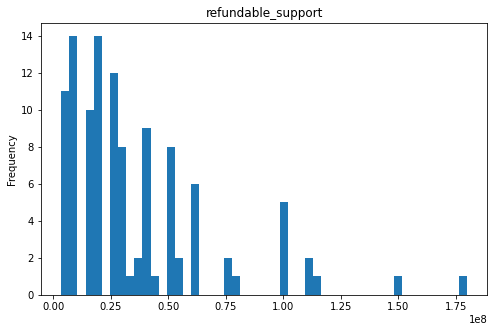

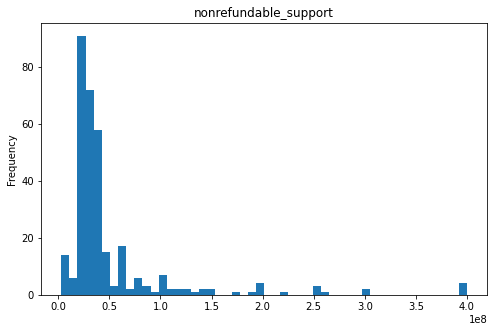

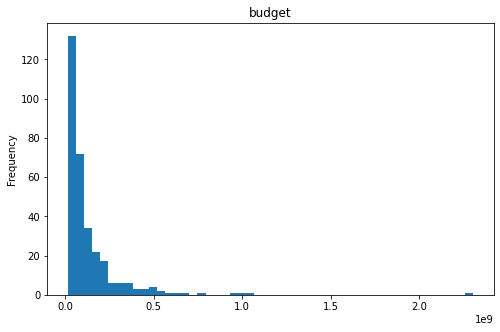

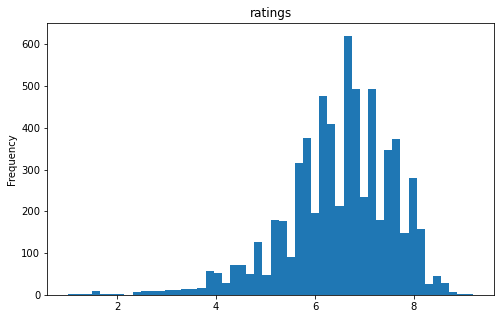

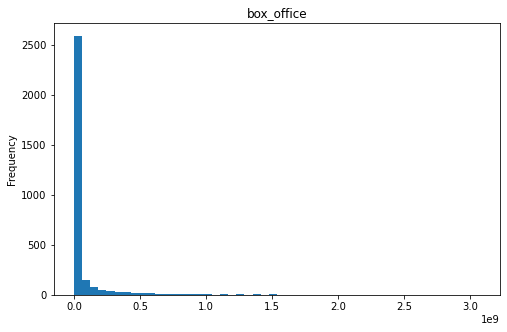

In [63]:
columns_to_hist = ['refundable_support', 'nonrefundable_support', 'budget', 'ratings','box_office']

for column in columns_to_hist:
    df[df[column] != 0].plot(y=column, title = column, bins = 50,kind = 'hist', figsize = (8, 5), legend = None)
    plt.show()

Просмотрим фильмы с самым высоким бюджетом. Правдоподобны ли значения.

In [64]:
df.sort_values(by='budget', ascending=False).head()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,2019,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""РФГ""; АО ""Маринс Групп Интертеймент""; ООО ""Фетисов Иллюзион""; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд.",Россия-Китай,О.Степченко,С.Сельянов,«6+» - для детей старше 6 лет,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,приключения,3.335971e+08,"[приключения, фэнтези]","[С.Сельянов, А.Петрухин]"
5437,Матильда,111005717,2017-08-17 12:00:00+00:00,2017,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,А.Учитель,«16+» - для детей старше 16 лет,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,фэнтези,5.117755e+08,"[фэнтези, комедия, семейный]","[А.Учитель, А.Достман, В.Винокур]"
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,2019,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,А.Максимов,«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.800000e+08,Фонд кино,6.0,история,7.177032e+08,"[история, биография, драма]","[А.Максимов, К.Эрнст]"
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,2019,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,Ф.Бондарчук,«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.440000e+08,Фонд кино,5.7,фантастика,0.000000e+00,"[фантастика, боевик]","[Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский]"
7171,Грех,111014419,2019-08-31 12:00:00+00:00,2019,Художественный,"НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств, ООО ""Жан Виго Италия"" (Jean Vigo Italia S.R.L.)","Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств,«16+» - для детей старше 16 лет,0.0,60000000.0,7.799420e+08,Министерство культуры,6.9,драма,5.424320e+07,"[драма, биография, история]",[НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств ]


In [65]:
df['budget'].max()

2305074303.0

Мы проверили правдоподобность данных. Максимальное значение может соответствовать действительности.

Необходимо посчитать, какую долю от общего бюджета фильма составляет государственная поддержка. Создадим новый столбец `governmental_support`.

In [66]:
df['governmental_support'] = (
    (df['refundable_support'] +
     df['nonrefundable_support'])/
    df['budget']
)

In [67]:
df['governmental_support'] = df['governmental_support'].round(2)

In [68]:
df['governmental_support'] = df['governmental_support'].fillna(0)

In [69]:
df['governmental_support'].value_counts().head(10)

0.00    7154
0.65      26
0.66      25
0.70      22
0.62      18
0.67      17
inf       17
0.64      15
0.69      10
0.43       8
Name: governmental_support, dtype: int64

In [70]:
df[df['governmental_support'] == np.inf].head()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list,governmental_support
2053,14+,111023614,2014-12-19 12:00:00+00:00,2014,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,О.Гранина,«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1,[мелодрама],"[О.Гранина, А.Зайцев]",inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,2015,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,П.Ануров,«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0,[драма],"[П.Ануров, Ф.Бондарчук, Д.Рудовский]",inf
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,2015,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,боевик,196572438.4,"[боевик, драма, криминал]","[ ООО ""Арт Пикчерс Студия""]",inf
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,2015,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,комедия,67418974.8,"[комедия, фэнтези]",[Т.Вайнштейн],inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,2015,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,мультфильм,184487551.4,"[мультфильм, приключения, фэнтези]",[А.Чистяков],inf


Все значения в столбце `governmental_support` равные бесконечности, свидетельствуют о том, что в данных строках отсутствуют сведения об общем бюджете фильма, следовательно невозможно расчитать долю средств государственной поддержки в общем бюджете. Заменим значения на `0`.

In [71]:
df.loc[df['governmental_support'] == np.inf, 'governmental_support'] = 0

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

За информацию о прокате в кинотеатрах мы возьмем данные столбца `box_office`. Она отражает информацию о сборах в рублях, полученных от проката кинокартин.

In [72]:
df.query('box_office != 0').pivot_table(index='year', values='box_office', aggfunc ='count')

,box_office
year,
2010,101
2011,109
2012,123
2013,179
2014,273
2015,462
2016,525
2017,357
2018,475


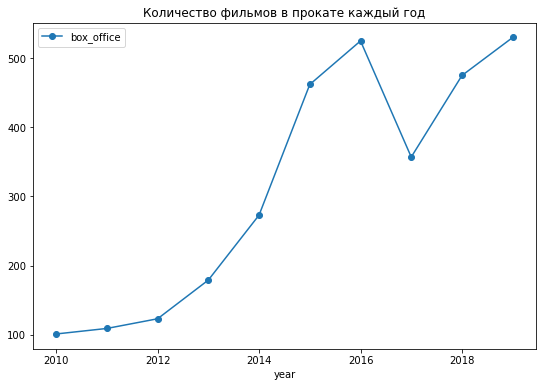

In [73]:
(
    df.query('box_office != 0').
    pivot_table(index='year', values='box_office', aggfunc ='count').
    plot(style='o-', title = 'Количество фильмов в прокате каждый год', figsize = (9,6))
)
plt.show()

Долю фильмов с указанной информацией о прокате, расчитаем путем деления количества фильмов с указанной информацией о кинопрокате к общему числу кинокартин.

In [74]:
share_box_office = len(df[df['box_office'] != 0]['box_office'])/len(df['box_office']) 

In [75]:
print(f'Доля кинокартин с указанной информацией о кинопрокате в кинотеатрах составляет {share_box_office:.1%}')

Доля кинокартин с указанной информацией о кинопрокате в кинотеатрах составляет 41.9%


In [76]:
df['share_box_office'] = df['box_office'] != 0

In [77]:
df.pivot_table(index='year', values='share_box_office', aggfunc ='mean')

,share_box_office
year,
2010,0.102538
2011,0.175241
2012,0.207420
2013,0.284127
2014,0.338290
2015,0.655319
2016,0.641809
2017,0.706931
2018,0.533109


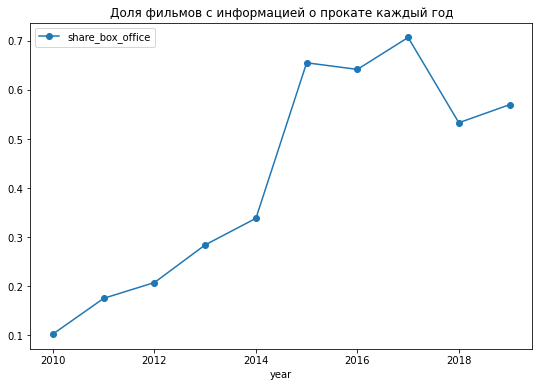

In [78]:
(
    df.
    pivot_table(index='year', values='share_box_office', aggfunc ='mean').
    plot(style='o-', title = 'Доля фильмов с информацией о прокате каждый год', figsize = (9,6))
)
plt.show()

Итак, рассмотрев количество фильмов вышедших в прокат по годам в период с 2010 по 2019 гг., можно увидеть восходящую тенденцию. С 2012 года произошел резкий рост показателя. Пик пришелся на 2016 год - было выпущено 525 фильмов в прокат, что в 5 раз больше, чем в 2010 году. В 2017 году наблюдается резкий спад показателя - по сравнению с предыдущим годом, количество фильмов в прокате уменьшилось на 32 %. В последующие годы снова наблюдается рост.

Если рассматривать динамику доли фильмов с информацией о прокате, можно увидеть так же восходящую тенденцию, причем резкий подъем наблюдается в 2015 году. Но пик пришелся на 2017 год - год с минимальным количеством вышедших фильмов. Далее наблюдается снижение показателя.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

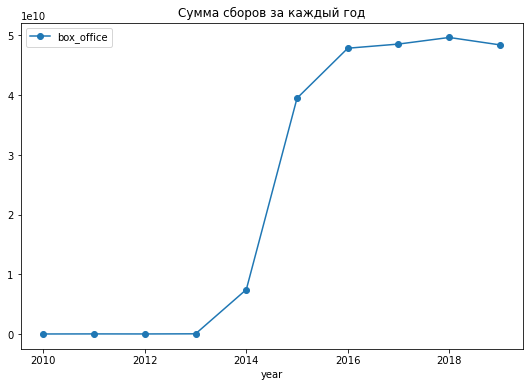

In [79]:
(
    df.query('box_office != 0').
    pivot_table(index='year', values='box_office', aggfunc ='sum').
    plot(style='o-', title = 'Сумма сборов за каждый год', figsize = (9,6))
)
plt.show()

In [80]:
df.query('box_office != 0').pivot_table(index='year', values='box_office', aggfunc ='sum')

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


In [81]:
df.query('box_office != 0 and year == 2010').head()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list,governmental_support,share_box_office
3790,"Легион_.(Фильм содержит сцены ужасов, насилия и жестокости)",121000310,2010-01-25 12:00:00+00:00,2010,Художественный,Болд Филмз,США,Скотт Стюарт,Дэвид Ланкастер,«18+» - запрещено для детей,...,0.0,0.0,unknown,0.0,unknown,560.0,[unknown],"[Дэвид Ланкастер, Майкл Литвак]",0.0,True
3791,Белка и Стрелка. Звездные собаки,114000310,2010-01-29 12:00:00+00:00,2010,Анимационный,"ОАО ""ЦНФ""",Россия,"С.Ушаков, И.Евланникова",С.А.Зернов,«0+» - для любой зрительской аудитории,...,0.0,0.0,unknown,6.0,мультфильм,22247.0,"[мультфильм, комедия, приключения]",[С.А.Зернов],0.0,True
3800,Из Парижа с любовью,121001310,2010-01-26 12:00:00+00:00,2010,Художественный,Европа Корпорейшн,Франция,Пьер Морель,Люк Бессон,«16+» - для детей старше 16 лет,...,0.0,0.0,unknown,7.3,боевик,1585.0,"[боевик, триллер, комедия]","[Люк Бессон, Индия Осборн]",0.0,True
3802,Золотое сечение,111000610,2010-01-26 12:00:00+00:00,2010,Художественный,"ОАО ""ТПО ""Санкт-Петербургская студия документальных фильмов""",Россия,С.Дебижев,А.Тельнов,«16+» - для детей старше 16 лет,...,0.0,0.0,unknown,4.9,приключения,760.0,[приключения],"[А.Тельнов, С.Федотов]",0.0,True
3803,Буду помнить,111000910,2010-01-28 12:00:00+00:00,2010,Художественный,"ООО ""ГРИНСИТИ""",Россия,В.Воробьев,А.Сафронов,«16+» - для детей старше 16 лет,...,0.0,0.0,unknown,7.2,военный,32175.0,[военный],[А.Сафронов],0.0,True


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

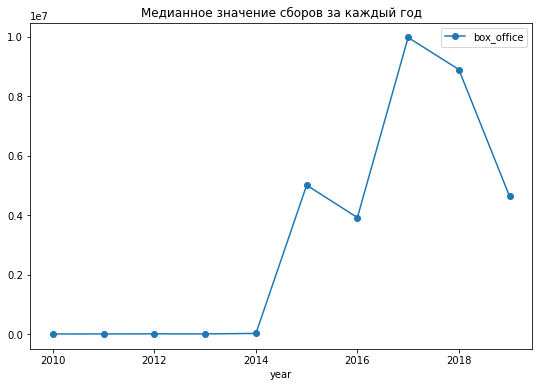

In [82]:
(
    df.query('box_office != 0').
    pivot_table(index='year', values='box_office', aggfunc ='median').
    plot(style='o-', title = 'Медианное значение сборов за каждый год', figsize = (9,6))
)
plt.show()

In [83]:
df.query('box_office != 0').pivot_table(index='year', values='box_office', aggfunc ='median')

,box_office
year,
2010,1710.000
2011,3000.000
2012,6220.000
2013,3580.000
2014,20400.000
2015,5003450.150
2016,3915041.020
2017,9968340.000
2018,8891102.210


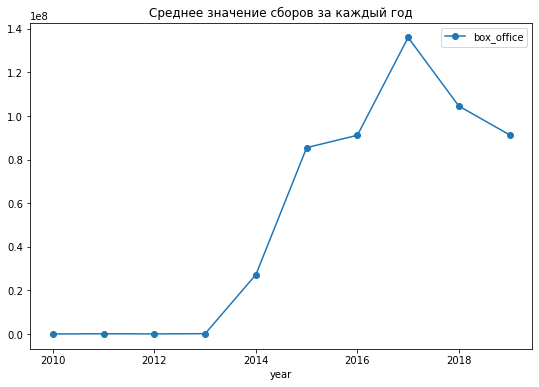

In [84]:
(
    df.query('box_office != 0').
    pivot_table(index='year', values='box_office', aggfunc ='mean').
    plot(style='o-', title = 'Среднее значение сборов за каждый год', figsize = (9,6))
)
plt.show()

In [85]:
df.query('box_office != 0').pivot_table(index='year', values='box_office', aggfunc ='mean')

,box_office
year,
2010,2.404608e+04
2011,1.293832e+05
2012,5.654815e+04
2013,1.664788e+05
2014,2.727089e+07
2015,8.549213e+07
2016,9.117390e+07
2017,1.360328e+08
2018,1.045651e+08


Исходя из графика динамики проката фильмов по годам, используя общую сумму сборов, а так же динамику медианного и среднего показателя суммы сборов, возникает вопрос о правдоподобности данных выгруженых за период с 2010 по 2014 год. Либо данные отражены не в полной мере, либо суммы могли быть указаны в тысячах рублей. На этом этапе можно сформулировать баг-репорт для уточнения данных.

В целом пик среднего и медианного показателя приходится на 2017 год. После наблюдает резкое снижение. В 2019 году среднее значение намного превышает медианное, что указывает на то, что в этот период были выпущены в прокат фильмы, принесшие большую популярность, в отличие от основной массы кинокартин.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

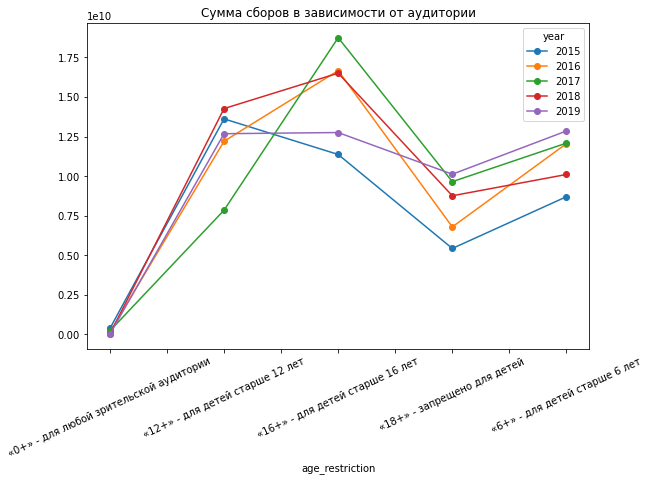

In [86]:
(
    df.query('box_office != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='age_restriction', values='box_office', columns='year', aggfunc ='sum').
    plot(style='o-', title = 'Сумма сборов в зависимости от аудитории', figsize = (9,6))
)
plt.xticks(rotation=25)
plt.show()

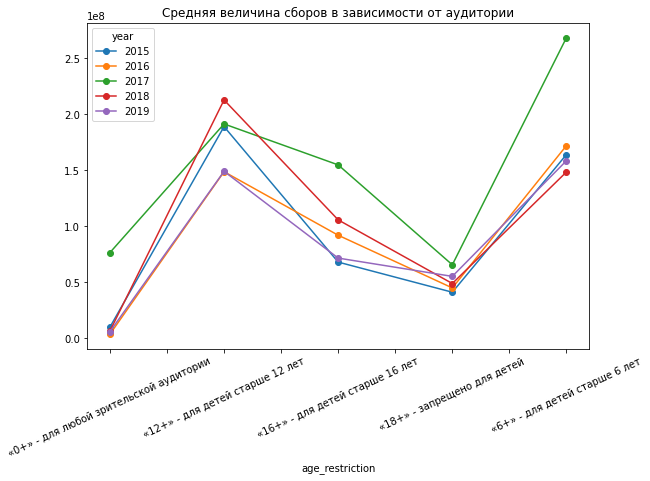

In [87]:
(
    df.query('box_office != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='age_restriction', values='box_office', columns='year', aggfunc ='mean').
    plot(style='o-', title = 'Средняя величина сборов в зависимости от аудитории', figsize = (9,6))
)
plt.xticks(rotation=25)
plt.show()

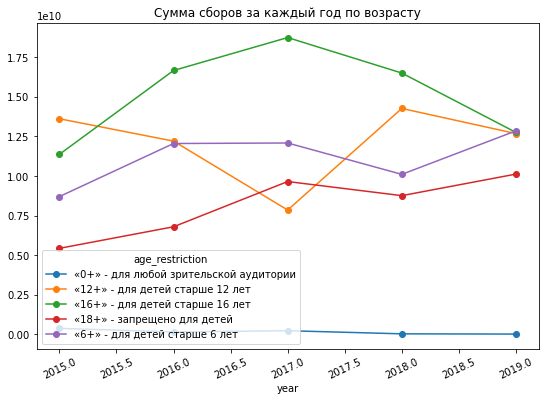

In [88]:
(
    df.query('box_office != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='year', values='box_office', columns='age_restriction', aggfunc ='sum').
    plot(style='o-', title = 'Сумма сборов за каждый год по возрасту', figsize = (9,6))
)
plt.xticks(rotation=25)
plt.show()

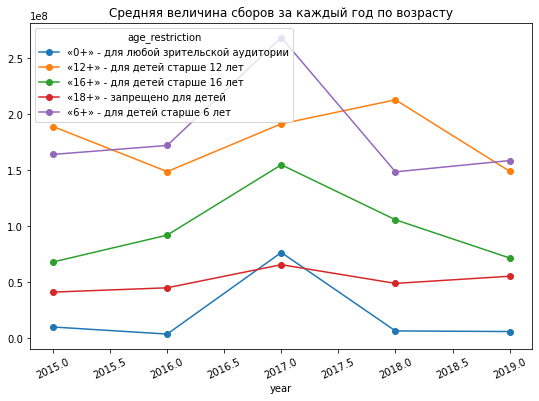

In [89]:
(
    df.query('box_office != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='year', values='box_office', columns='age_restriction', aggfunc ='mean').
    plot(style='o-', title = 'Средняя величина сборов за каждый год по возрасту', figsize = (9,6))
)
plt.xticks(rotation=25)
plt.show()

In [90]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

Рассмотрев среднюю величину бюджета на один фильм в прокате, можно увидеть высокое значение в категории 6+ в 2017 году. Просмотрим фильмы этой категории. Эта величина оправдана, так как в этот период было выпущено две кинокартины с высоким бюджетом.

In [91]:
df.query('age_restriction == "«6+» - для детей старше 6 лет" and year == 2017').sort_values(by='box_office').tail()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list,governmental_support,share_box_office
5641,Ёлки Новые,111011617,2017-12-21 12:00:00+00:00,2017,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпиловский, А.Черномазов (А.Нужный)",Т.Бекмамбетов,«6+» - для детей старше 6 лет,...,50000000.0,174381922.0,Фонд кино,5.8,комедия,8.554511e+08,"[комедия, мелодрама]","[Т.Бекмамбетов, Г.Стрижевская]",0.57,True
3637,Зверопой,124000217,2017-02-03 12:00:00+00:00,2017,Анимационный,"Дентсю, Фьюджи Телевижн Нетворк Интертейнмент, Хаммер энд Тонгс, Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США - Великобритания - Япония,"Гарт Дженнингс, Кристоф Лоурделет",Игорь Хайт,«6+» - для детей старше 6 лет,...,0.0,0.0,unknown,7.3,мультфильм,8.866141e+08,"[мультфильм, мюзикл, комедия]","[Игорь Хайт, Джанет Хили, Бретт Хоффман]",0.00,True
3235,Босс-Молокосос,124000317,2017-02-09 12:00:00+00:00,2017,Анимационный,ДримУоркс Анимейшн,США,Том МакГрат,Рэмси Энн Наито,«6+» - для детей старше 6 лет,...,0.0,0.0,unknown,6.5,мультфильм,1.376727e+09,"[мультфильм, комедия, приключения]",[Рэмси Энн Наито],0.00,True
3742,Гадкий я 3,124001617,2017-06-15 12:00:00+00:00,2017,Анимационный,"Иллюминейшен Интертейнмент, Юниверсал Пикчерз",США,"Кайл Балда, Эрик Гуильон, Пьер Коффан",Кристофер Меледандри,«6+» - для детей старше 6 лет,...,0.0,0.0,unknown,6.3,мультфильм,1.390393e+09,"[мультфильм, фантастика, фэнтези]","[Кристофер Меледандри, Джанет Хили, Бретт Хоффман]",0.00,True
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,2017,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,Л.Верещагин,«6+» - для детей старше 6 лет,...,400000000.0,590192191.0,Фонд кино,7.5,спорт,2.779686e+09,"[спорт, драма]","[Л.Верещагин, А.Златопольский, Н.Михалков, ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""]",0.68,True


Итак рассмотрев влияние возврастного ограничения аудитории на сборы фильма по годам в период с 2015 по 2019 гг. можно сделать следующие выводы:
* 2016,2017 и 2018 года больше всего собрано фильмами категории `16+`, в 2015 году пик пришелся на категорию `12+`;
* для 2019 года все категории кроме категории `0+` принесли примерно одинаковое количество дохода с продаж;
* фильмы `18+` не принесли больших доходов за весь период с 2015 по 2019 гг.;
* для аудитории `0+` сборы были минимальными, и их величина практически не менялась из года в год;
* что касается средней суммы сборов, в 2017 году эта величина была максимальной практически во всех возрастных категориях;
* для категории `6+` наблюдается плавный рост в заданный период, исключение составил 2018 год, где наблюдается небольшое снижение общей величины сборов;
* в категории `12+` максимальные показатели общей суммы сборов были в 2015 и в 2018 гг., в последующие годы за ними наблюдается снижение сумм. Минимальная сумма зафиксирована в 2017 году;
* фильмы `16+` были самыми продаваемыми за весь указанный период, исключение составил 2015 год, где лидерами по прокату оказались кинокартины `12+`. Пик пришелся на 2017 год;

* если же смотреть по посещаемости фильмов самыми популярными являются категории `12+` и `6+`. Фильмы `0+` b `18+` не популярны. Такая картина прослеживается из года в год.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.
Рассмотрим динамику общего бюджета фильмов в зависимости от года.

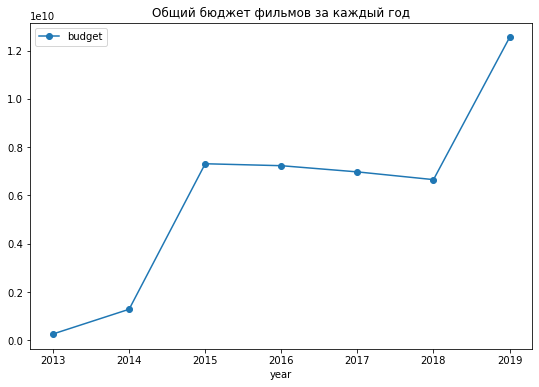

In [92]:
(
    df.query('budget != 0').
    pivot_table(index='year', values='budget', aggfunc ='sum').
    plot(style='o-', title = 'Общий бюджет фильмов за каждый год', figsize = (9,6))
)
plt.show()

В 2019 году произошел резкий скачок показателя, несмотря на то, что сумма сборов практически не менялась по сравнению с предыдущими годами. Просмотрим фильмы, вышедшие в прокат за этот год с максимальным бюджетом.

In [93]:
df.query('year == 2019').sort_values(by='budget', ascending=False).head()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list,governmental_support,share_box_office
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,2019,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""РФГ""; АО ""Маринс Групп Интертеймент""; ООО ""Фетисов Иллюзион""; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд.",Россия-Китай,О.Степченко,С.Сельянов,«6+» - для детей старше 6 лет,...,90000000.0,2.305074e+09,Фонд кино,5.8,приключения,3.335971e+08,"[приключения, фэнтези]","[С.Сельянов, А.Петрухин]",0.12,True
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,2019,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,А.Максимов,«12+» - для детей старше 12 лет,...,400000000.0,9.800000e+08,Фонд кино,6.0,история,7.177032e+08,"[история, биография, драма]","[А.Максимов, К.Эрнст]",0.51,True
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,2019,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,Ф.Бондарчук,«12+» - для детей старше 12 лет,...,400000000.0,9.440000e+08,Фонд кино,5.7,фантастика,0.000000e+00,"[фантастика, боевик]","[Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский]",0.53,False
7171,Грех,111014419,2019-08-31 12:00:00+00:00,2019,Художественный,"НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств, ООО ""Жан Виго Италия"" (Jean Vigo Italia S.R.L.)","Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств,«16+» - для детей старше 16 лет,...,60000000.0,7.799420e+08,Министерство культуры,6.9,драма,5.424320e+07,"[драма, биография, история]",[НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств ],0.08,True
6699,Тобол,111002419,2019-02-16 12:00:00+00:00,2019,Художественный,"ООО Кинокомпания ""Соливс"" по заказу АО ""ВБД Груп""",Россия,"И.Зайцев, О.Урушев",Э.Илоян,«16+» - для детей старше 16 лет,...,130000000.0,4.998266e+08,Фонд кино,5.8,история,1.381629e+08,"[история, драма]","[Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, О.Урушев]",0.26,True


Исключим аномальные значения рейтинга при построении графика, чтобы избежать искажений результатов.

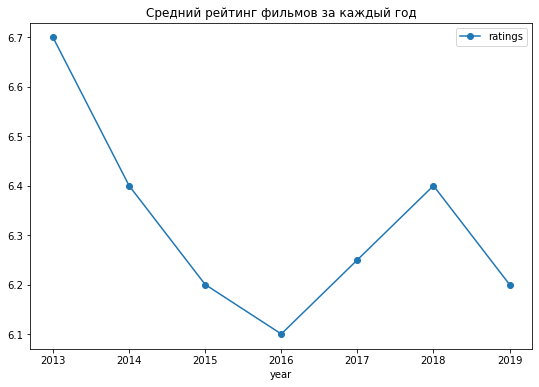

In [94]:
(
    df.query('4 < ratings < 9 and budget != 0').
    pivot_table(index='year', values='ratings', aggfunc ='median').
    plot(style='o-', title = 'Средний рейтинг фильмов за каждый год', figsize = (9,6))
)
plt.show()

Рассмотрим взаимосвязь бюджета и суммы сборов с проката фильмов. Построим диаграмму рассеяния и посчитаем коэффициент Пирсона.

Создадим новый столбец с суммой средств государственной поддержки.

In [95]:
df['governmental_support_sum'] = df['refundable_support'] + df['nonrefundable_support']

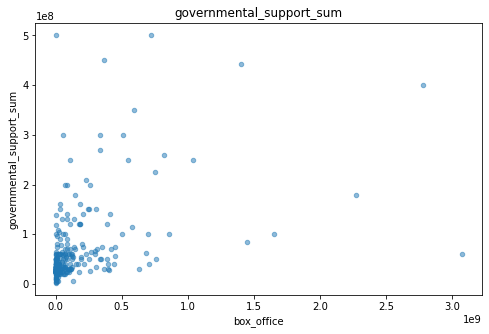

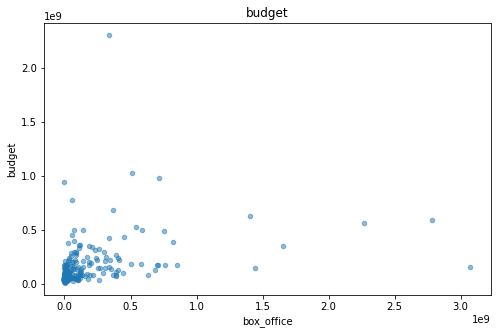

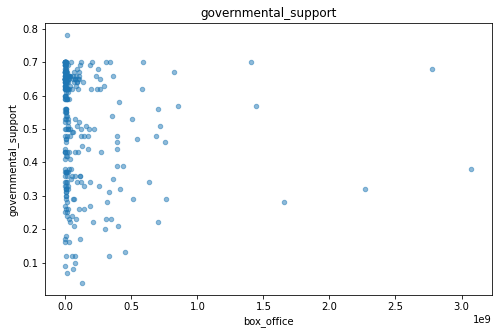

In [96]:
columns_to_plot = ['governmental_support_sum',           # построим диаграммы рассеяния по каждому столбцу с помощью цикла
                   'budget',
                   'governmental_support'
                   ]

for corr_plot in columns_to_plot:
        df[df[corr_plot] != 0].plot(x='box_office', title=corr_plot, y=corr_plot, kind='scatter', alpha = 0.5, figsize = (8,5))


In [97]:
(
    df.
    query('box_office != 0 and budget != 0 and governmental_support_sum !=0 and year not in [2010,2011,2012,2013,2014]').
    loc[:, ('box_office','governmental_support_sum','governmental_support','budget')].
    corr()
)

,box_office,governmental_support_sum,governmental_support,budget
box_office,1.000000,0.481803,-0.112289,0.372924
governmental_support_sum,0.481803,1.000000,0.096865,0.723014
governmental_support,-0.112289,0.096865,1.000000,-0.315222
budget,0.372924,0.723014,-0.315222,1.000000


In [98]:
def value_corr(year):                                 # создание функции value_corr()
                                                      # для расчета коэффициента корреляции по годам
    df_corr = df[df['year'] == year]                  # между показателями доли государственной поддержки и 
    df_corr = df_corr[df_corr['box_office'] != 0]     # суммы сборов
    df_corr = df_corr[df_corr['budget'] != 0]
    df_corr = df_corr[df_corr['governmental_support_sum'] != 0]
                                                        
    corr = df_corr['governmental_support'].corr(df_corr['box_office']) 
    
    return print(corr)  # Функция возвращает число - значение corr

In [99]:
for y in [2015,2016,2017,2018,2019]:
    print('Коэффициент корреляции для ', y, 'года равен' )
    value_corr(y)



Коэффициент корреляции для  2015 года равен
-0.2635866458741736
Коэффициент корреляции для  2016 года равен
0.09789781747144292
Коэффициент корреляции для  2017 года равен
-0.06474795143985973
Коэффициент корреляции для  2018 года равен
-0.10024451221756678
Коэффициент корреляции для  2019 года равен
-0.1549715655806435


Мы расчитали коээфиценты Пирсона для каждого интересующего нас столбца. Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1.
Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный.
Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0.
Если рост одной величины связан с уменьшением другой, коэффициент отрицательный.
Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

Анализ коэффициента и графики рассеяния показывают, что наибольшая связь наблюдаетсся между показателями бюджета фильмов и средствами государтвенной поддержки, коээфициент корреляции в данном случае равен 0.72.
В случае с влиянием средств государственной поддержки и бюджета фильма на сумму сборов, тесной связи не наблюдается. Связь прямая, чем выше указанные показатели, тем выше сумма сборов.

Но если рассмотреть влияние доли государственной поддержки в общем бюджете на сумму сборов, можно увидеть незначительную отрицательную связь, близкую к 0. И так же чем выше бюджет, тем ниже доля государственной поддржки.
Причем анализируя эту связь по годам можно сделать вывод, что в период с 2016 года, эффективность государственной поддержки в области кино падает.

Еще следует отметить, что рассматривать влияние показателей при столь небольшой выборке может привести к неточностям в исследованиях. Чем выше полнота сведений, тем более точные результаты. Напомним, что доля фильмов с указанной информацией о прокате за все 10 лет составляет только 41% от общего числа фильмов в прокате. То есть больше половины кинокартин не содержит нужных нам сведений для исследования.

Исследуем окупаемость средств государственной поддержки, и оценим влияние их величины на рейтинг фильмов.
Для этого рассмотрим соотношение средств государственной поддержки и суммы сборов.
Создадим новый столбец `roi` - коэффициент окупаемости вложений и сопоставим его динамику с динамикой изменения величины государственной поддержки, и доли государственной поддержки в общем бюджете фильмов.

In [100]:
df['roi'] = (df['box_office'] - df['budget'])/df['budget']

In [101]:
df['roi'].value_counts().head()

 inf         2833
-1.000000      14
 0.915426       1
 1.102887       1
-0.984551       1
Name: roi, dtype: int64

In [102]:
df.query('roi == -1').head()

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,...,financing_source,ratings,genres,box_office,genres_to_list,producer_to_list,governmental_support,share_box_office,governmental_support_sum,roi
2800,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,2015,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,...,Министерство культуры,6.3,драма,0.0,[драма],[Б.Токарев],0.60,False,25000000.0,-1.0
3337,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,2017,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,...,Министерство культуры,5.2,мелодрама,0.0,[мелодрама],[А.Голутва],0.16,False,10000000.0,-1.0
3711,Колобанга. Только для пользователей Интернета (26 серий),214010116,2016-10-06 12:00:00+00:00,2016,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,...,Министерство культуры,7.0,мультфильм,0.0,"[мультфильм, приключения, детектив]",[А.Ревва],0.62,False,11520000.0,-1.0
5661,"Детский юмористический киножурнал ""ЕРАЛАШ"", выпуски 312-323",111011917,2017-12-26 12:00:00+00:00,2017,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.Сулейманова и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,...,Министерство культуры,7.2,детский,0.0,"[детский, комедия]","[ООО ""Продюсерский центр ЕРАЛАШ""]",0.56,False,25000000.0,-1.0
6476,Зима,111023518,2019-03-15 12:00:00+00:00,2019,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,З.Болотаев,«16+» - для детей старше 16 лет,...,Министерство культуры,5.2,драма,0.0,"[драма, криминал]","[З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П.Гудков, А.Агеев]",0.63,False,25000000.0,-1.0


Заменим значения `inf` и `-1` на `0` так как в этих строках нет возможности расчитать показатель окупаемости из-за отсутствия некоторых значений.

In [103]:
df.loc[df['roi'] == np.inf, 'roi'] = 0

In [104]:
df.loc[df['roi'] == -1, 'roi'] = 0

In [105]:
df['roi'].value_counts().head()

 0.000000    2847
-0.558674       1
 1.102887       1
-0.984551       1
-0.316061       1
Name: roi, dtype: int64

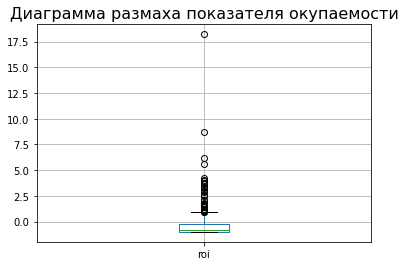

In [106]:
df.query('roi != 0').boxplot(column='roi')
plt.title("Диаграмма размаха показателя окупаемости", fontsize=16)
plt.show()

Исходя из диаграммы можно увидеть, что основная часть показателей имеет отрицательное значение, но мы не будем рассматривать данный показатель, как абсолютный, так как у нас есть информация только о полученных средствах от кинопроката в России. Мы возьмем этот показатель, как измеряющий эффективность проекта для определенной аудитории. 

Избавляться от аномально высоких значений мы  не будем. Рассмотрим фильмы с высокими показателями окупаемости в дальнейшем исследовании, и включим из в анализ.

Построим матрицу диаграмм рассеяния для столбцов `budget`,`governmental_support`,`roi`, чтобы изучить их взаимосвязь.

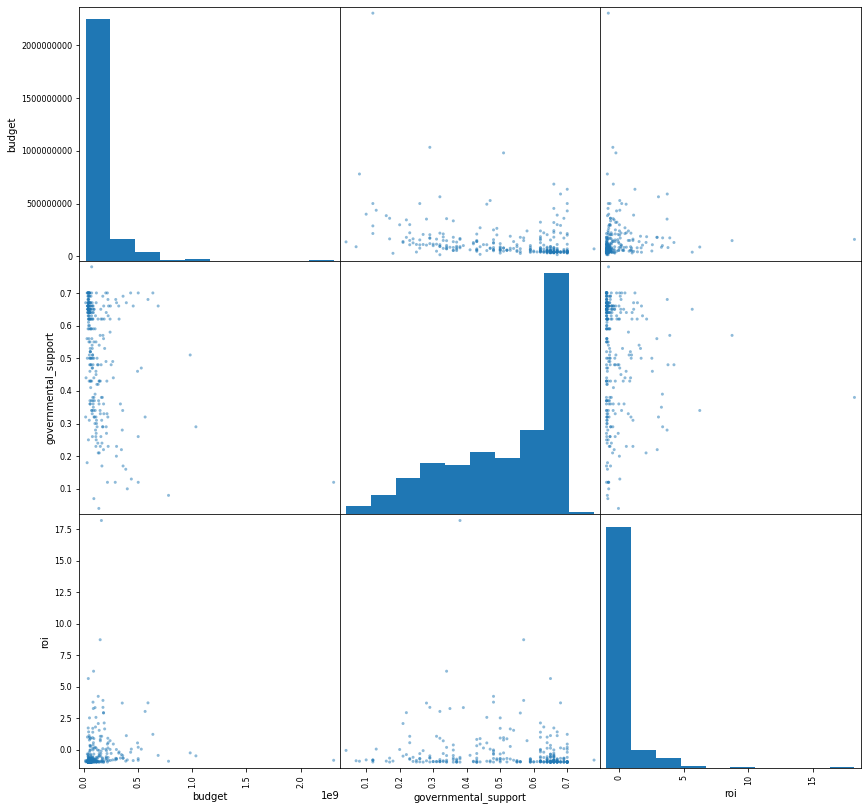

In [107]:
(                                                                 # построим матрицу диаграм рассеяния для следубщих столбцов
    pd.plotting.                                                  
    scatter_matrix
    (df.
     query('governmental_support != 0 and roi != 0 and year not in [2010,2011,2012,2013,2014]').
     loc[:, ('budget','governmental_support','roi')], figsize=(14, 14))
) 
plt.show()

In [108]:
(
    df.query('governmental_support != 0 and roi != 0 and year not in [2010,2011,2012,2013,2014]').
    loc[:, ('budget','governmental_support','roi','governmental_support_sum')].
    corr()
)

,budget,governmental_support,roi,governmental_support_sum
budget,1.000000,-0.315222,0.086366,0.723014
governmental_support,-0.315222,1.000000,-0.102427,0.096865
roi,0.086366,-0.102427,1.000000,0.132187
governmental_support_sum,0.723014,0.096865,0.132187,1.000000


In [109]:
def value_corr1(year1):                                 # создание функции value_corr1()
                                                      # для расчета коэффициента корреляции по годам
    df_corr1 = df[df['year'] == year1]                # между показателями доли государственной поддержки и 
    df_corr1 = df_corr1[df_corr1['roi'] != 0]         # окупаемости
    df_corr1 = df_corr1[df_corr1['governmental_support'] != 0]
    
                                                        
    corr1 = df_corr1['governmental_support'].corr(df_corr1['roi']) 
    
    return print(corr1)  # Функция возвращает число - значение corr1

In [110]:
for x in [2015,2016,2017,2018,2019]:
    print('Коэффициент корреляции для ', x, 'года равен' )
    value_corr1(x)

Коэффициент корреляции для  2015 года равен
-0.18123703006856115
Коэффициент корреляции для  2016 года равен
-0.006642677216053393
Коэффициент корреляции для  2017 года равен
-0.247890501261326
Коэффициент корреляции для  2018 года равен
-0.019175719008754002
Коэффициент корреляции для  2019 года равен
-0.08634974609857778


Так как мы увидели неправдоподобные сведения о сборах в рублях за период с 2010 по 2014 года, мы исключим их из анализа и расчитаем взаимосвязь показателя окупаемости проекта с долей государственной поддержки, с суммой государственной поддержки и общим бюджетом фильма.

Изучив диаграмму рассеяния и коэффициенты Пирсона сделаем следующие выводы:

* окупаемость проекта имеет слабую положительную связь с суммой государственной поддержки и общим бюджетом фильма. Чем больше последние показатели, тем выше окупаемость. Коэффициент корреляции в первом случае равен 0.13, во втором 0.08;
* окупаемость проекта и доля государственной поддержки имеет слабую отрицательнуя связь. Фильмы с меньшей долей государственной поддержки в общем бюджете имеют большую окупаемость. Самый плохой показатель по эффективности государственной поддержки наблюдается в 2017 году, коэффициент Пирсона равен -0.25.

Рассмотрим взаимосвязь рейтинга фильма и его окупаемости.

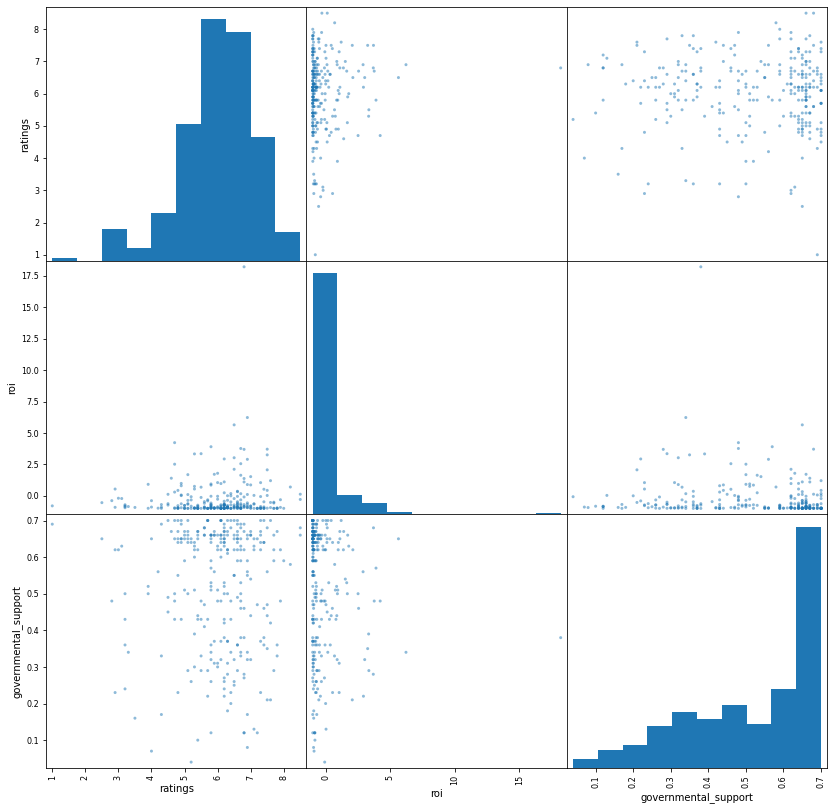

In [111]:
(
    pd.plotting.                                                  
    scatter_matrix
    (df.
    query('ratings != 0 and roi != 0 and year not in [2010,2011,2012,2013,2014] and governmental_support!= 0').
    loc[:, ('ratings','roi','governmental_support')], figsize=(14, 14))
) 
plt.show()

In [112]:
(
    df.
    query('ratings != 0 and roi != 0 and year not in [2010,2011,2012,2013,2014] and governmental_support!= 0').
    loc[:, ('ratings','roi','governmental_support')].
    corr()
)

,ratings,roi,governmental_support
ratings,1.000000,0.081360,-0.007441
roi,0.081360,1.000000,-0.110199
governmental_support,-0.007441,-0.110199,1.000000


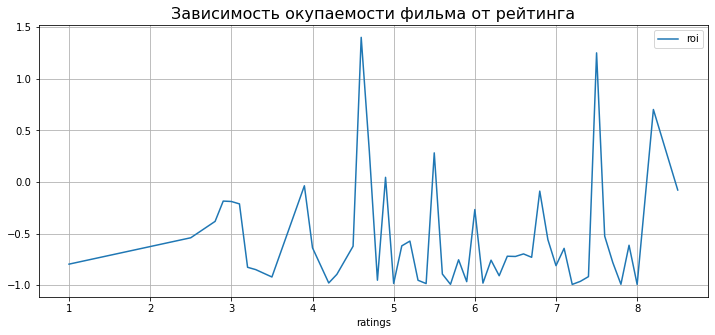

In [113]:
(                                                                       # построим график зависимости средней цены квадрата 
    df.
    query('ratings != 0 and roi != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index = 'ratings', values='roi', aggfunc='median').
    plot(grid=True, figsize=(12, 5))
)
plt.title("Зависимость окупаемости фильма от рейтинга", fontsize=16)
plt.show()

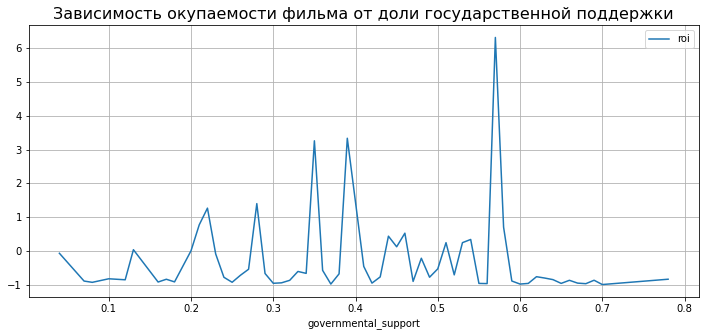

In [114]:
(                                                                       # построим график зависимости средней цены квадрата 
    df.
    query('governmental_support != 0 and roi != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index = 'governmental_support', values='roi', aggfunc='median').
    plot(grid=True, figsize=(12, 5))
)
plt.title("Зависимость окупаемости фильма от доли государственной поддержки", fontsize=16)
plt.show()

Просмотрим фильмы с самыми большими показателями окупаемости, и с самыми низкими. 

In [115]:
(
    df.
    query('roi > 0 and year not in [2010,2011,2012,2013,2014]').
    loc[:, ('budget','box_office','roi','title','genres','production_country','film_studio','director')].
    sort_values(by='roi',ascending=False).
    head(10)
)

,budget,box_office,roi,title,genres,production_country,film_studio,director
7456,160000000.0,3.073569e+09,18.209804,Холоп,комедия,Россия,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",К.Шипенко
5708,148585222.0,1.445732e+09,8.729984,Лёд,unknown,Россия,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", Государственная телевизионная компания ""Телеканал ""Россия"" - филиал федерального государственного унитарного предприятия ""Всероссийская государственная телевизионная и радиовещательная компания""",О.Трофим
5749,87649127.0,6.334623e+08,6.227251,Я худею,комедия,Россия,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",А.Черномазов (псевдоним Алексей Нужный)
3229,39000000.0,2.590991e+08,5.643566,"Гуляй, Вася !",комедия,Россия,"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",Р.Каримов
2701,130619336.0,6.830291e+08,4.229157,Самый Лучший День,комедия,Россия,"ООО ""ТаББаК""",А.Першин (псевдоним Ж.Крыжовников)
5641,174381922.0,8.554511e+08,3.905618,Ёлки Новые,комедия,Россия,"ООО ""ТаББаК""","Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпиловский, А.Черномазов (А.Нужный)"
6178,82496889.0,3.932796e+08,3.767206,Непрощенный,драма,Россия,"ООО ""Кинокомпания Большое кино""",С.Андреасян
5653,590192191.0,2.779686e+09,3.709798,Движение вверх,спорт,Россия,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",А.Мегердичев
5505,352477575.0,1.655038e+09,3.695441,Последний богатырь,комедия,Россия,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Дисней Компании СНГ"", АО ""ВБД Груп""",Д.Дьяченко
5659,174464395.0,7.592268e+08,3.351758,Три богатыря и принцесса Египта,мультфильм,Россия,"ООО ""Студия анимационного кино ""Мельница""",К.Феоктистов


In [116]:
df.query('roi > 0 and year not in [2010,2011,2012,2013,2014]').pivot_table(index='year', values='roi', aggfunc ='count')


,roi
year,
2015,13
2016,9
2017,13
2018,17
2019,11


In [117]:
(
    df.
    query('roi < 0 and year not in [2010,2011,2012,2013,2014]').
    loc[:, ('budget','box_office','roi','title','genres','production_country','film_studio','director')].
    sort_values(by='roi',ascending=True).
    head(10)
)

,budget,box_office,roi,title,genres,production_country,film_studio,director
3149,91000000.0,1550.0,-0.999983,Я-Учитель,мелодрама,Россия,"НП Киностудия детских и юношеских фильмов ""Илья Муромец""",С.Мокрицкий
3504,90822766.0,9000.0,-0.999901,День До,драма,Россия,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""","А.Котт, В.Котт, А.Карпиловский, Б.Хлебников"
2803,59560746.0,6000.0,-0.999899,Битва с экстрасенсами,фэнтези,Россия,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",И.Кордзаия
2527,37943652.0,4450.0,-0.999883,Вдвоем на льдине.,мелодрама,Россия,"ООО ""Первое творческое объединение""","Н.Джорджадзе, В.Игнатьев"
3657,180000000.0,58720.0,-0.999674,Простая история .,драма,Россия,"ООО ""КИНОБЮРО""",В.Татарский
2150,37371262.0,19820.0,-0.999470,РЕВЕРБЕРАЦИЯ,unknown,Россия,"ООО ""Артлайт""",К.Сухарьков
2948,46200000.0,35897.0,-0.999223,ВСЯ НАША НАДЕЖДА...,драма,Россия,"ООО ""Продюсерский центр ""Парадиз""",К.Геворкян
2982,69428728.0,55800.0,-0.999196,Сдается дом со всеми неудобствами,комедия,Россия,"ФГУП ""Киноконцерн ""Мосфильм"", ООО ""Киностудия ""ВЕРТИКАЛЬ""",В.Сторожева
3147,70000000.0,58500.0,-0.999164,Память осени,драма,Россия,"ООО ""Продюсерский центр ""Синема Продакшн""",А.Соколов
2169,43000000.0,40050.0,-0.999069,Трагедия в бухте Роджерс,детектив,Россия,"ООО ""Валдай""",Ф.Абрютин


In [118]:
df.query('roi < 0 and year not in [2010,2011,2012,2013,2014]').pivot_table(index='year', values='roi', aggfunc ='count')

,roi
year,
2015,66
2016,48
2017,24
2018,35
2019,48


Просчитаем медианное значение показателя окупаемости в зависимости от типа кинокартины.

In [119]:
(
    df.
    query('roi != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='type', values='roi', aggfunc='median')
)

,roi
type,
Анимационный,-0.480246
Художественный,-0.858264


In [120]:
(
    df.
    query('genres != "unknown" and roi !=0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='genres', values='roi', aggfunc='median').sort_values(by='roi',ascending=False).
    reset_index()[0:10]
)

,genres,roi
0,спорт,0.868574
1,ужасы,-0.298230
2,приключения,-0.320060
3,семейный,-0.400197
4,история,-0.495614
5,мультфильм,-0.548849
6,реальное ТВ,-0.590986
7,боевик,-0.668722
8,биография,-0.683131
9,комедия,-0.687515


In [121]:
(
    df.
    query('genres != "unknown" and roi !=0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='genres', values='roi', aggfunc='sum').sort_values(by='roi',ascending=False).
    reset_index()[0:10]
)

,genres,roi
0,комедия,33.061713
1,спорт,4.224819
2,ужасы,0.508342
3,биография,0.410173
4,аниме,0.000000
5,документальный,0.000000
6,концерт,0.000000
7,короткометражка,0.000000
8,для взрослых,0.000000
9,мультфильм,-0.295036


Изучим величину сборов в зависимости от жанра фильма для выявления текущих трендов.

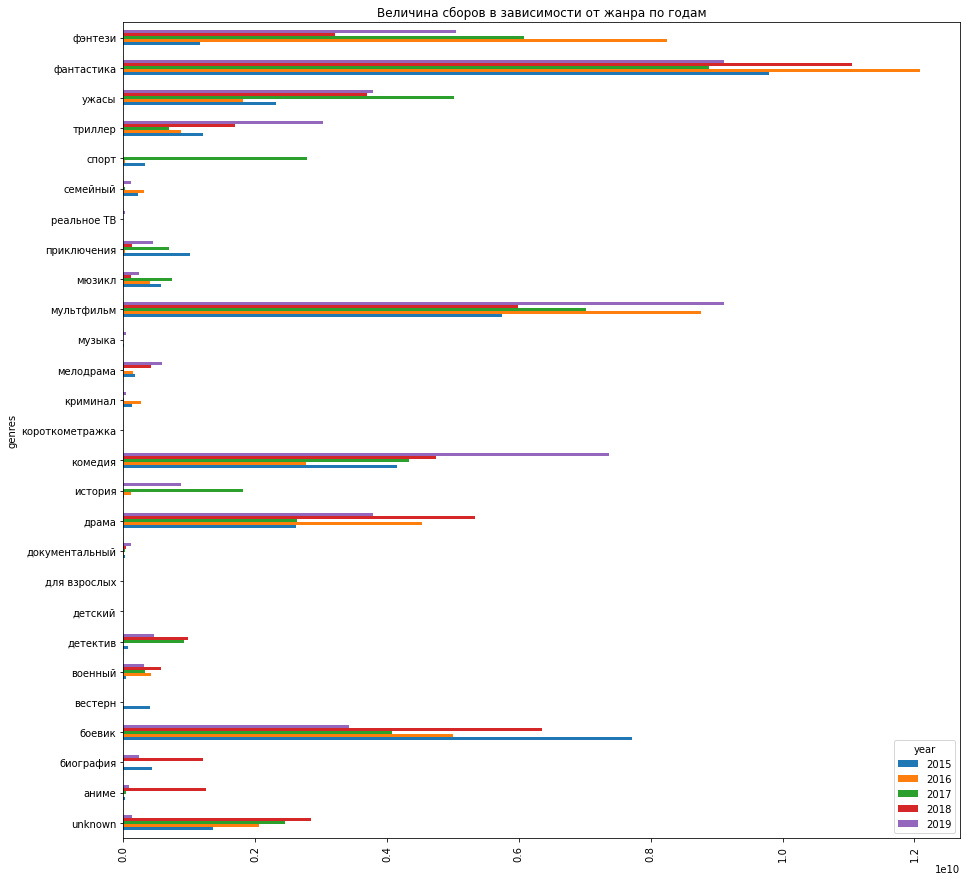

In [122]:
(
    df.query('box_office != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='genres', values='box_office', columns='year', aggfunc ='sum').
    plot(kind = 'barh', title = 'Величина сборов в зависимости от жанра по годам', figsize = (15,15))
)
plt.xticks(rotation=90)
plt.show()

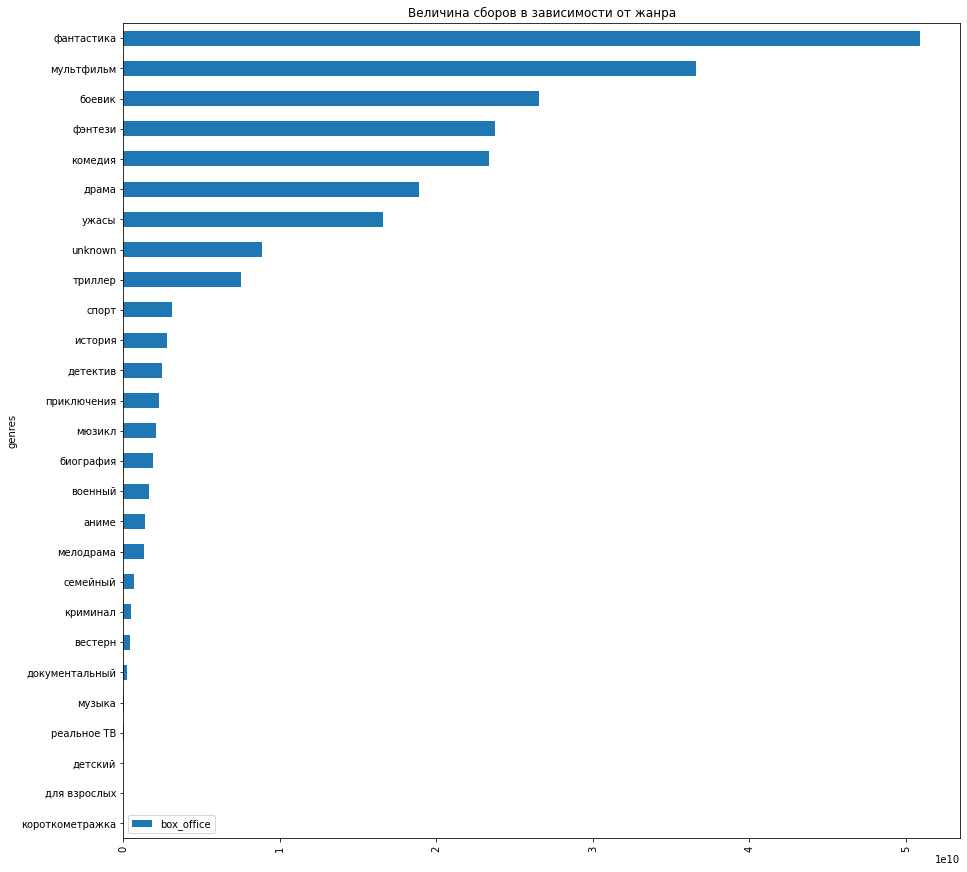

In [123]:
(
    df.query('box_office != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='genres', values='box_office', aggfunc ='sum').sort_values(by='box_office').
    plot(kind = 'barh', title = 'Величина сборов в зависимости от жанра', figsize = (15,15))
)
plt.xticks(rotation=90)
plt.show()

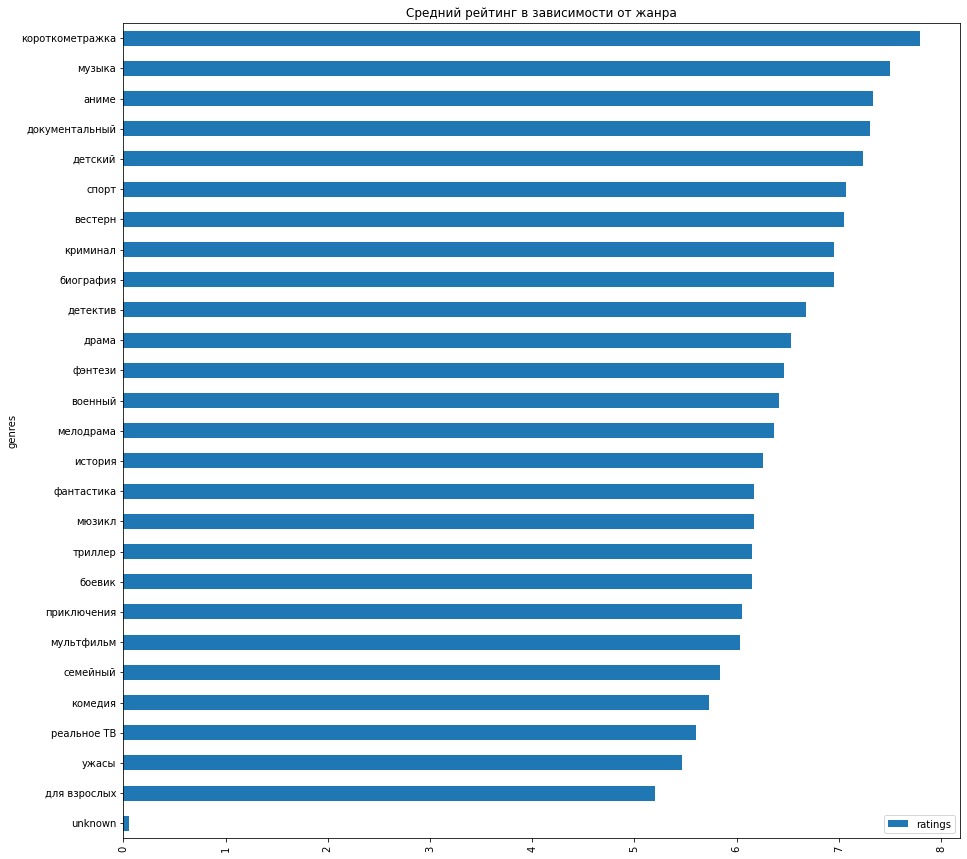

In [124]:
(
    df.query('box_office != 0 and year not in [2010,2011,2012,2013,2014]').
    pivot_table(index='genres', values='ratings', aggfunc = 'mean').sort_values(by='ratings').
    plot(kind = 'barh', title = 'Средний рейтинг в зависимости от жанра', figsize = (15,15))
)
plt.xticks(rotation=90)
plt.show()

### Шаг 5. Общий вывод

Итак мы изучили рынок российского кинопроката и выявили текущие тренды. Мы уделили внимание фильмам, которые получили государственную поддержку и изучили, насколько такие фильмы интересны зрителю.

Исходя из результатов анализа, мы сделали следующие выводы:
* при изучении динамики количества вышедших фильмов в кинопрокат в период с 2010 по 2019 гг можно наблюдать тенденцию роста. Исключением стал 2017 год, где произошло резкое снижение показателя на 32%. Затем снова можно было наблюдать резкий рост;
* следует отметить, что база данных отражает неполные сведения о прокате фильмов. Только 41 % от общего числа содержит информацию о полученых сборах. При этом если изучить динамику по годам, полнота сведений с годами увеличивается и к 2017 году достигла пика (71% сведений о прокате кинокартин содержали информацию и полученых сборах);
* с 2010 по 2014 года сведения содержат от 10 до 33 % нужной нам информации, при этом также стоит отметить, что в указаный период наблюдаются аномально низкие значения сумм, полученных от проката кинокартин. Для недопущения искажения результатов анализа, мы исключим сведения в период с 2010 по 2014 гг.
* изучив средние и медианные значения сумм сборов можно наблюдать резкий рост обоих показателей с 2014 по 2017 год. Пик приходится на 2017 год. Затем следует падение. Среднее значение превышает медианное, причем эта разница наиболее выражена в 2016 и 2019 гг., что может свидетельствовать о выходе некоторых фильмов с очень высокой популярностью;
* исследуя влияние возрастных категорий на сборы фильмов с 2015 по 2019 гг. можно увидеть, что меньше всего собрали денег фильмы категории `0+`, при этом из года в год ситуация не меняется. Пик приходится на категорию `16+`. Затем популярность пользуются фильмы `12+`, и немного уступаю им кинокартины `6+`. Фильмы `18+` менее популярны, но стоит отметить, что с каждым годом востребованость на рынке их растет;
* рассмотрев среднюю сумму сборов по категориям в 2017 году можно наблюдать пик в категории `6+`. Изучив данные мы выяснили, что в этом году вышли в прокат картины "Зверопой" и "Елки Новые", которорые собрали огромные суммы (более 800 млн.руб.);
* рассмотрев данные о бюджетах фильмов мы снова видим отсутствие или неполноту сведений с 2010 по 2014 гг., поэтому рассматривая данные с 2015 года можно наблюдать практически не меняющуюся картину до 2018 года. В 2019 году происходит резкий подьем показателя. Общая сумма бюджета всех кинокартин увеличилась приблизительно на 70%;
* если посмотреть динамику суммарного рейтинга, динамика будет существенно отличаться. В 2017 году вышли картины с самым низким рейтингом. Пик пришелся на 2015 год;

Рассматривая период с 2015 по 2019 гг, самыми продаваемыми кинокартинами стали фильмы категории "16+", жанров - фантастика, мультфильм, боевик, фэнтези, комедия. Если рассматривать 2019 год, как крайний период, для отображения наиболее актуальных трендов можно выделить: фантастика, мультфильм, комедия, фэнтези, ужасы.

Фильмы с самыми высокими значениями рейтинга - короткометражка, музыка, аниме, документальный, детский.
В 2016 году вышло много фильмов с невысоким рейтингом, начиная с 2017 года средний показатель рейтинга увеличивался, а значит улучшалось качество кинокартин.

Изучив влияние государственной поддержки при производстве кинокартин на сумму собранных с прокатов средств, мы увидели слабую отрицательную связь. То есть увеличение доли государственной поддержки не приводит к увеличению заинтересованности к фильму. При этом начиная с 2016 года ситуация ухудшается.


Самые доходные фильмы за период с 2015 по 2019 гг. это комедия, спорт, ужасы, биография и мультфильм. Так же можно выделить доходные фильмы по типам - такими являются художественное кино.
Самую высокую доходность принесла комедия российского производства "Холоп" режиссера К.Шипенко.